In [1]:
import os
import shutil

In [4]:
os.environ['KAGGLE_CONFIG_DIR']="/content"

In [5]:
!kaggle datasets download -d amanullahasraf/covid19-pneumonia-normal-chest-xray-pa-dataset

 99% 1.89G/1.91G [00:34<00:00, 68.6MB/s]
100% 1.91G/1.91G [00:34<00:00, 60.1MB/s]


In [6]:
# shutil.copy2('covid19-pneumonia-normal-chest-xray-pa-dataset.zip','drive/My Drive/Dataset')

'drive/My Drive/Dataset/covid19-pneumonia-normal-chest-xray-pa-dataset.zip'

In [6]:
from zipfile import ZipFile
fname='covid19-pneumonia-normal-chest-xray-pa-dataset.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')

In [7]:
os.mkdir("Dataset")
shutil.move('covid','Dataset')
shutil.move("normal","Dataset")
shutil.move("pneumonia","Dataset")

'Dataset/pneumonia'

In [8]:
os.chdir('Dataset')
os.rename('covid','0')
os.rename('normal','1')
os.rename('pneumonia','2')

os.chdir('../')

In [9]:
import random
os.chdir('Dataset')
if os.path.isdir('train/0/') is False:
  os.mkdir('train')
  os.mkdir('test')
  os.mkdir('valid')

  for i in range(0,3):
    shutil.move(f'{i}','train')
    os.mkdir(f'test/{i}')
    os.mkdir(f'valid/{i}')

   
    test_samples=random.sample(os.listdir(f'train/{i}'),100)
    for j in test_samples:
      shutil.move(f'train/{i}/{j}',f'test/{i}')

    valid_samples=random.sample(os.listdir(f'train/{i}'),200)
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}',f'valid/{i}') 

os.chdir("../")  

In [10]:
!ls

covid19-pneumonia-normal-chest-xray-pa-dataset.zip  kaggle.json
Dataset						    sample_data


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [12]:
train_datagen=image.ImageDataGenerator(
     rescale=1./255,
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=.1,
    shear_range=.1,
    horizontal_flip=True
                                       )

test_datagen=image.ImageDataGenerator(
    rescale=1./255
                                       )
valid_datagen=image.ImageDataGenerator(
    rescale=1./255
                                       )

In [13]:
train_path='Dataset/train'
test_path='Dataset/test'
valid_path='Dataset/valid'

In [14]:
train_gen=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=128,
    classes=['0','1','2']
)

test_gen=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=128,
    classes=['0','1','2']
)

valid_gen=valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    batch_size=128,
    classes=['0','1','2']
)


Found 6006 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 596 images belonging to 3 classes.


In [33]:
valid_gen.class_indices

{'0': 0, '1': 1}

In [15]:

model=Sequential()

model.add(Conv2D(64,padding='same',kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(512,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

In [16]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [18]:
model.fit(x=train_gen,validation_data=valid_gen,epochs=20,verbose=2,shuffle=True)

Epoch 1/20
47/47 - 175s - loss: 0.9649 - accuracy: 0.4843 - val_loss: 0.7126 - val_accuracy: 0.6628
Epoch 2/20
47/47 - 167s - loss: 0.6414 - accuracy: 0.7383 - val_loss: 0.5109 - val_accuracy: 0.8104
Epoch 3/20
47/47 - 166s - loss: 0.5110 - accuracy: 0.8039 - val_loss: 0.4769 - val_accuracy: 0.8272
Epoch 4/20
47/47 - 166s - loss: 0.4603 - accuracy: 0.8257 - val_loss: 0.4071 - val_accuracy: 0.8607
Epoch 5/20
47/47 - 166s - loss: 0.4202 - accuracy: 0.8520 - val_loss: 0.4206 - val_accuracy: 0.8607
Epoch 6/20
47/47 - 167s - loss: 0.3789 - accuracy: 0.8650 - val_loss: 0.3098 - val_accuracy: 0.8977
Epoch 7/20
47/47 - 168s - loss: 0.3313 - accuracy: 0.8834 - val_loss: 0.3039 - val_accuracy: 0.9060
Epoch 8/20
47/47 - 166s - loss: 0.2863 - accuracy: 0.9043 - val_loss: 0.2872 - val_accuracy: 0.8876
Epoch 9/20
47/47 - 163s - loss: 0.3289 - accuracy: 0.8836 - val_loss: 0.2760 - val_accuracy: 0.9060
Epoch 10/20
47/47 - 164s - loss: 0.2697 - accuracy: 0.9089 - val_loss: 0.4765 - val_accuracy: 0.8238

In [19]:
predictions=model.predict(test_gen)

In [20]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes,rotation=0)

  if normalize:
    cm=cm.astype('float')/am.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
import itertools
cm=confusion_matrix(y_true=test_gen.classes,y_pred=np.argmax(predictions,axis=-1))

Confusion matrix,without normalization
[[36 40 24]
 [30 33 37]
 [30 37 33]]


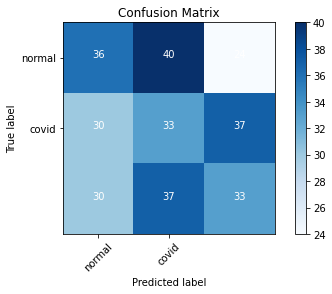

In [22]:
cm_plot_labels=['normal','covid']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')